# Librería Scikit-Learn

Uno de los entornos más sencillos de aprender para realizar modelos de machine learning, es la librería Scikit-Learn (sklearn). Esta librería dota a los usuarios de una gran variedad de técnicas y métricas con una fácil implementación y unos resultados aceptables.

Enlace a la documentación oficial: https://scikit-learn.org/stable/modules/classes.html

In [45]:
import pandas as pd
import numpy as np
import sklearn.datasets 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans

## Aprendizaje supervisado

Los problemas que contienen un conjunto de variables explicativas y una (o más) variable(s) objetivo se denominan problemas de aprendizaje supervisado. Si además la variable objetivo es contínua, diremos que el problema es de regresión. Por el contrario, si la variable objetivo es categórica, diremos que es un problema de clasificación.

### Problemas de clasificación

In [11]:
# Carga del fichero de datos de clasificación
dataset = sklearn.datasets.load_wine()
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
# Pasamos a formato dataframe
df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
# Agregamos la variable objetivo
df["target"] = dataset["target"]
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
# Comprobamos si hay NAs
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [20]:
# Clases balanceadas?
df["target"].value_counts(normalize = True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

In [28]:
# Dividir train-test
X = dataset["data"]
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [48]:
# Entrenamiento del modelo
svm = LinearSVC(C = 0.1)

Enlace del modelo : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [49]:
svm.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.1)

In [50]:
predictions = svm.predict(X_test)

In [51]:
# Metricas para evaluar un clasificador

print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

              precision    recall  f1-score   support

     class_0       1.00      0.86      0.92        14
     class_1       0.86      1.00      0.92        18
     class_2       1.00      0.95      0.98        22

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



### Problemas de regresión

In [50]:
dataset = sklearn.datasets.load_boston()
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [51]:
# Pasamos a formato dataframe
df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [52]:
# Agregamos la variable objetivo
df["target"] = dataset["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [53]:
# Comprobamos si hay NAs
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [54]:
# Que haríamos para sacar información del target? ¿Y de las variables explicativas?

In [55]:
# Dividir train-test
X = dataset["data"].copy()
y = dataset["target"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [56]:
reg = ElasticNet()
reg.fit(X_train,y_train)

ElasticNet()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [57]:
predictions = reg.predict(X_test)
predictions

array([19.56240783, 27.75227414, 35.99831244, 19.32923066, 29.46975195,
       30.63265444, 27.54594243,  8.18087926, 14.6143395 , 29.98049923,
       29.62687337, 22.46725025, 14.72463847, 31.52788667, 16.88778067,
       23.7223952 , 20.79145044, 36.11507811, 19.64645419, 16.2624932 ,
       15.56437205, 24.62137127, 31.98613932, 35.64246917, 29.72930641,
       21.48608389, 18.08472848, 23.57824703, 25.10371212, 21.61725281,
       25.00191853, 33.20642949, 17.04016189, 23.36430104, 23.19251177,
       33.01476797, 28.91562459, 17.48120425, 16.04589379, 34.6772319 ,
       29.74489641, 20.58687801, 21.62233184, 36.22714622,  8.31766497,
       27.31694392, 22.53445409, 27.05991189, 17.52778822, 22.44170364,
       32.63729465, 24.673612  , 22.78081362, 12.47576335, 25.76250549,
       17.98020475, 13.28083597,  5.21051416, 31.24885571, 14.91423333,
       20.53399088, 24.33143843, 23.16530648, 18.61360921, 24.28198026,
       28.02827926, 26.45815004, 21.19515471, 25.03927296, 29.99

In [58]:
predictions_train = reg.predict(X_train)

In [62]:
# Metricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 5.011148656865698
El MAE de train del modelo es: 3.488622405080966
El MAPE de train del modelo es: 16.497360300595002 %

El RMSE de test del modelo es: 5.3702524667496085
El MAE de test del modelo es: 3.911643047505154
El MAPE de test del modelo es: 19.945049945067947 %


## Aprendizaje no supervisado

El aprendizaje no supervisado busca encontrar similitud en los datos sin que exista ninguna etiqueta que los relacione. Estas busquedas suelen estar basadas en distancias y pueden relacionarse de muchas maneras diferentes. Su utilidad se encuentra en casos como detección de anomalías, sistemas recomendadores o búsquedas de temas en textos.

### Problemas de clustering

In [13]:
# Lectura de los datos
df = pd.read_csv("../../Datos/iris.csv")
df.columns = [x.replace(".","_") for x in df.columns]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
X, y = df[[x for x in df.columns if x != "variety"]].values, df["variety"]
change_label = {
    "Setosa": 0,
    "Versicolor": 1,
    "Virginica": 2,
}
y = y.map(change_label).values

In [30]:
# ESTO NO SIEMPRE ES NECESARIO
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [35]:
cluster = KMeans(n_clusters = 3, random_state = 123)
cluster.fit(X_train)

KMeans(n_clusters=3, random_state=123)

In [36]:
prediction_train = cluster.predict(X_train)
prediction_train

array([1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1])

In [38]:
prediction_test = cluster.predict(X_test)
prediction_test

array([2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1,
       2])

In [43]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 123)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

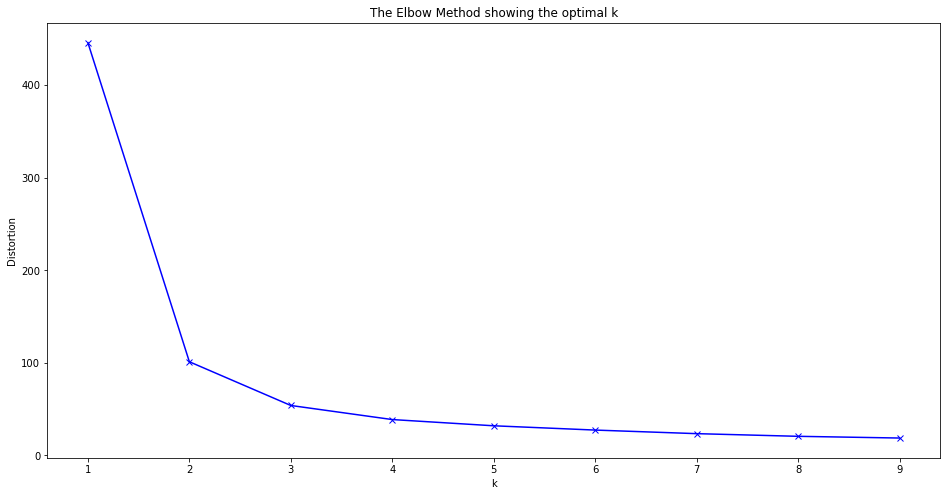

In [42]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [47]:
silhouette_score(X_train,prediction_train)

0.5320783503581544

In [48]:
silhouette_score(X_test, prediction_test)

0.5941146183752026